In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec


from nest import detectors
from nest import pls
from nest import overlap 
from nest import nell 
from nest import skymap

from nest.skymap import Skymaps
from nest.overlap import Response
from nest.nell import AngularResponse, Sensitivity_ell

%config InlineBackend.figure_format = 'retina'

from astropy.cosmology import Planck15
cosmo = Planck15
H0 =  cosmo.H0.to('1/s').value

c = 299792458 #m/s

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

# Example file for LIGO

* Skymaps

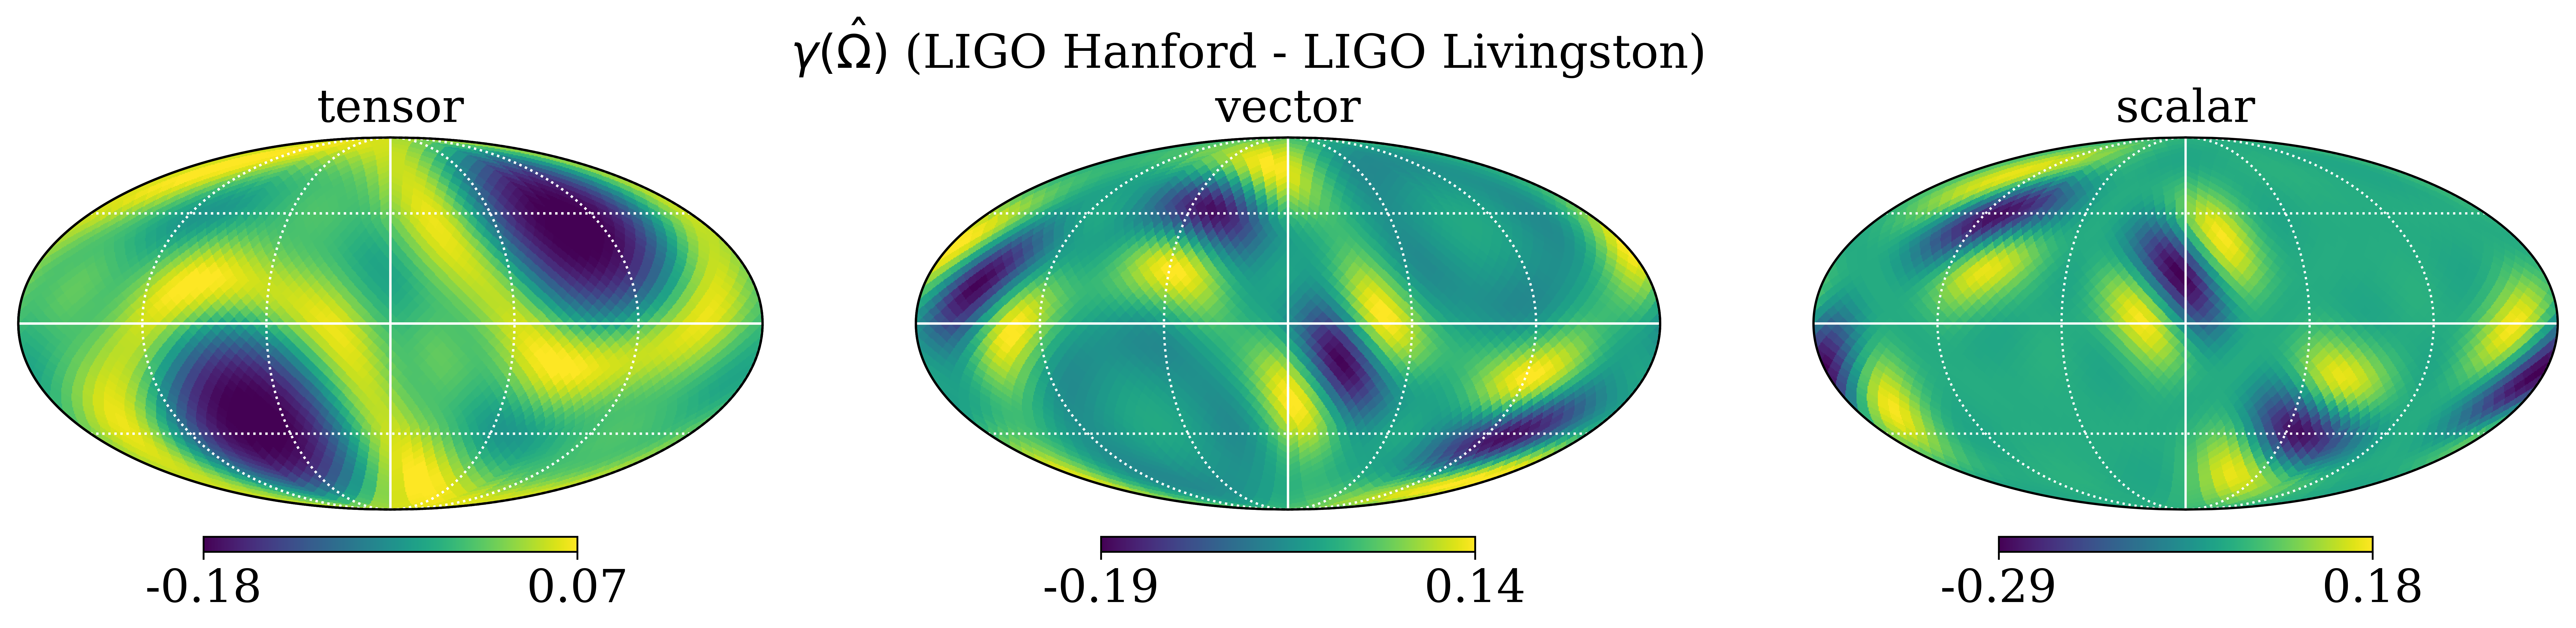

In [2]:
apf_LIGO = Skymaps.AntennaPattern('LIGO H', 'LIGO L', 16, 25, 0)

* Response (Overlap Reduction function)

In [10]:
f = np.logspace(np.log10(3), np.log10(3000), 1000)

print('Calculating Overlaps LIGO H - LIGO L')
print('- tensor modes')
R_t_LIGO = Response.overlap('LIGO H', 'LIGO L', f, 0, 't', None)
print('- vector modes')
R_v_LIGO = Response.overlap('LIGO H', 'LIGO L', f, 0, 'v', None)
print('- scalar modes')
R_s_LIGO = Response.overlap('LIGO H', 'LIGO L', f, 0, 's', None)

Calculating Overlaps LIGO H - LIGO L
- tensor modes
- vector modes
- scalar modes


/opt/anaconda3/envs/dethenv/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/dethenv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'LIGO Response')

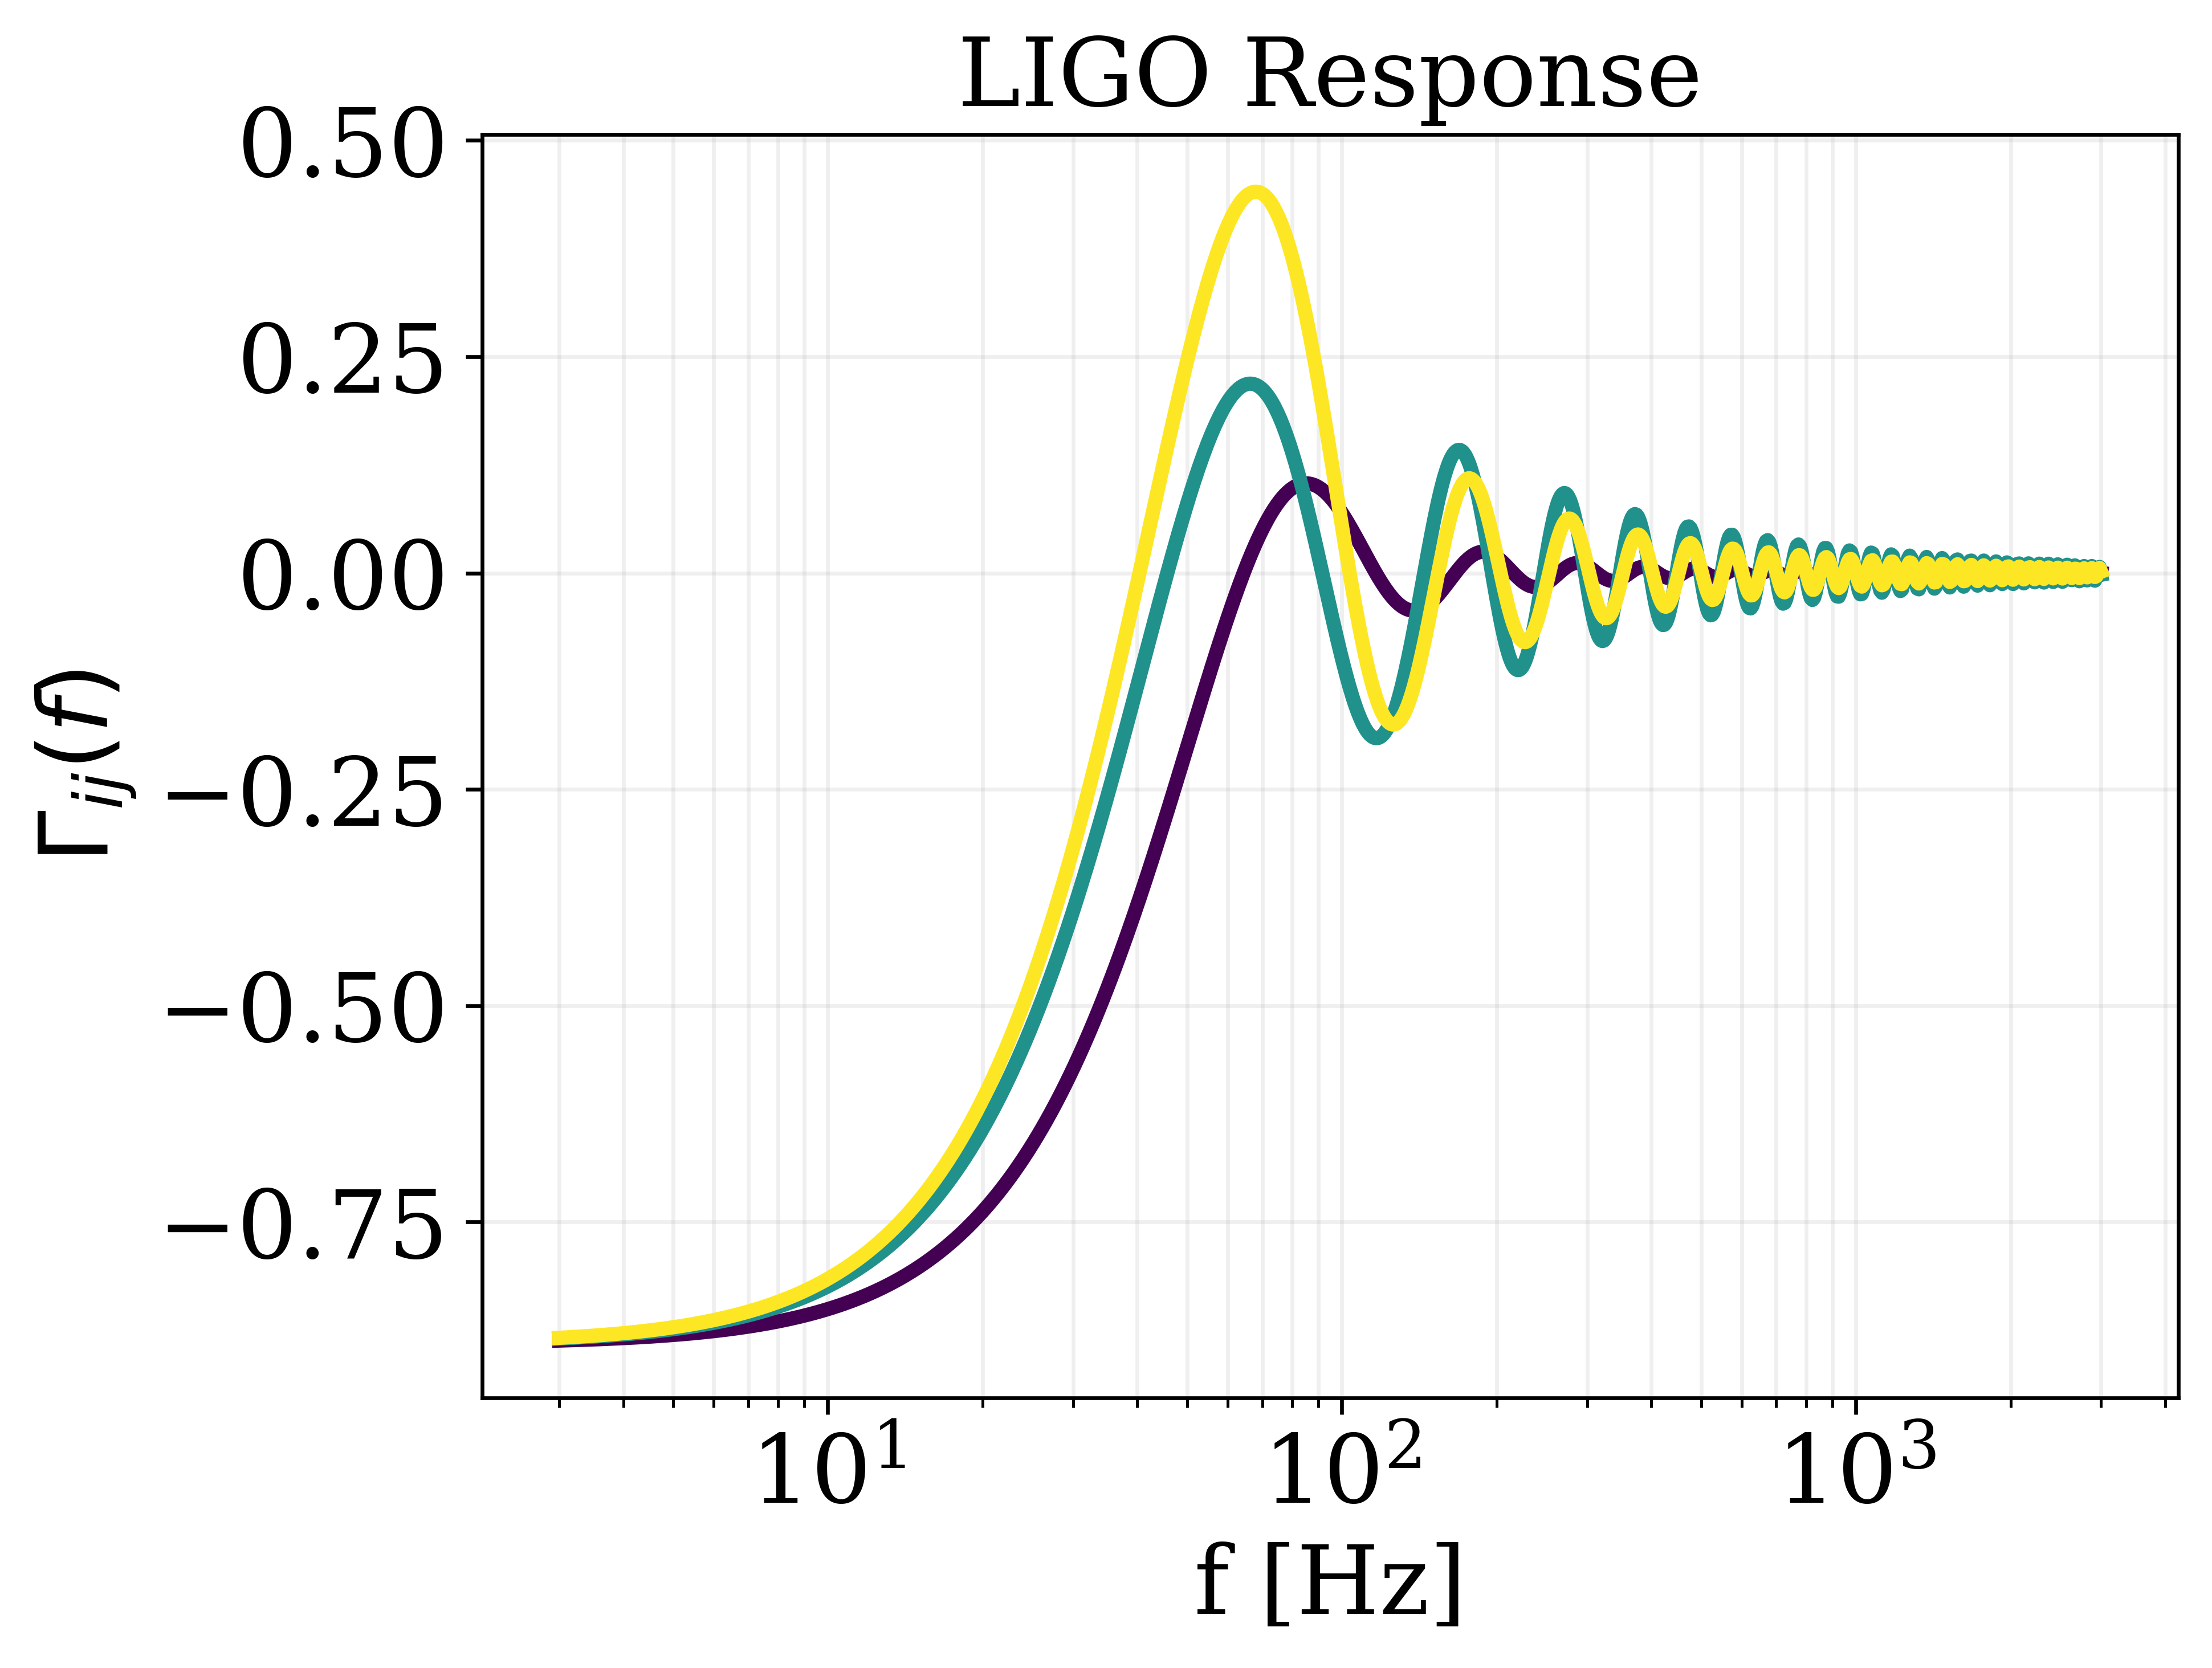

In [11]:
colors = cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, R_t_LIGO, label='Tensor modes', color = colors[0] )
plt.plot(f, R_v_LIGO, label='Vector', color = colors[1])
plt.plot(f, R_s_LIGO, label='Scalar', color= colors[2])
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Gamma_{ij}(f)$')
plt.grid(alpha=0.2, which='both')
plt.title('LIGO Response')

* Power Law Integrated Sensitivity Curve

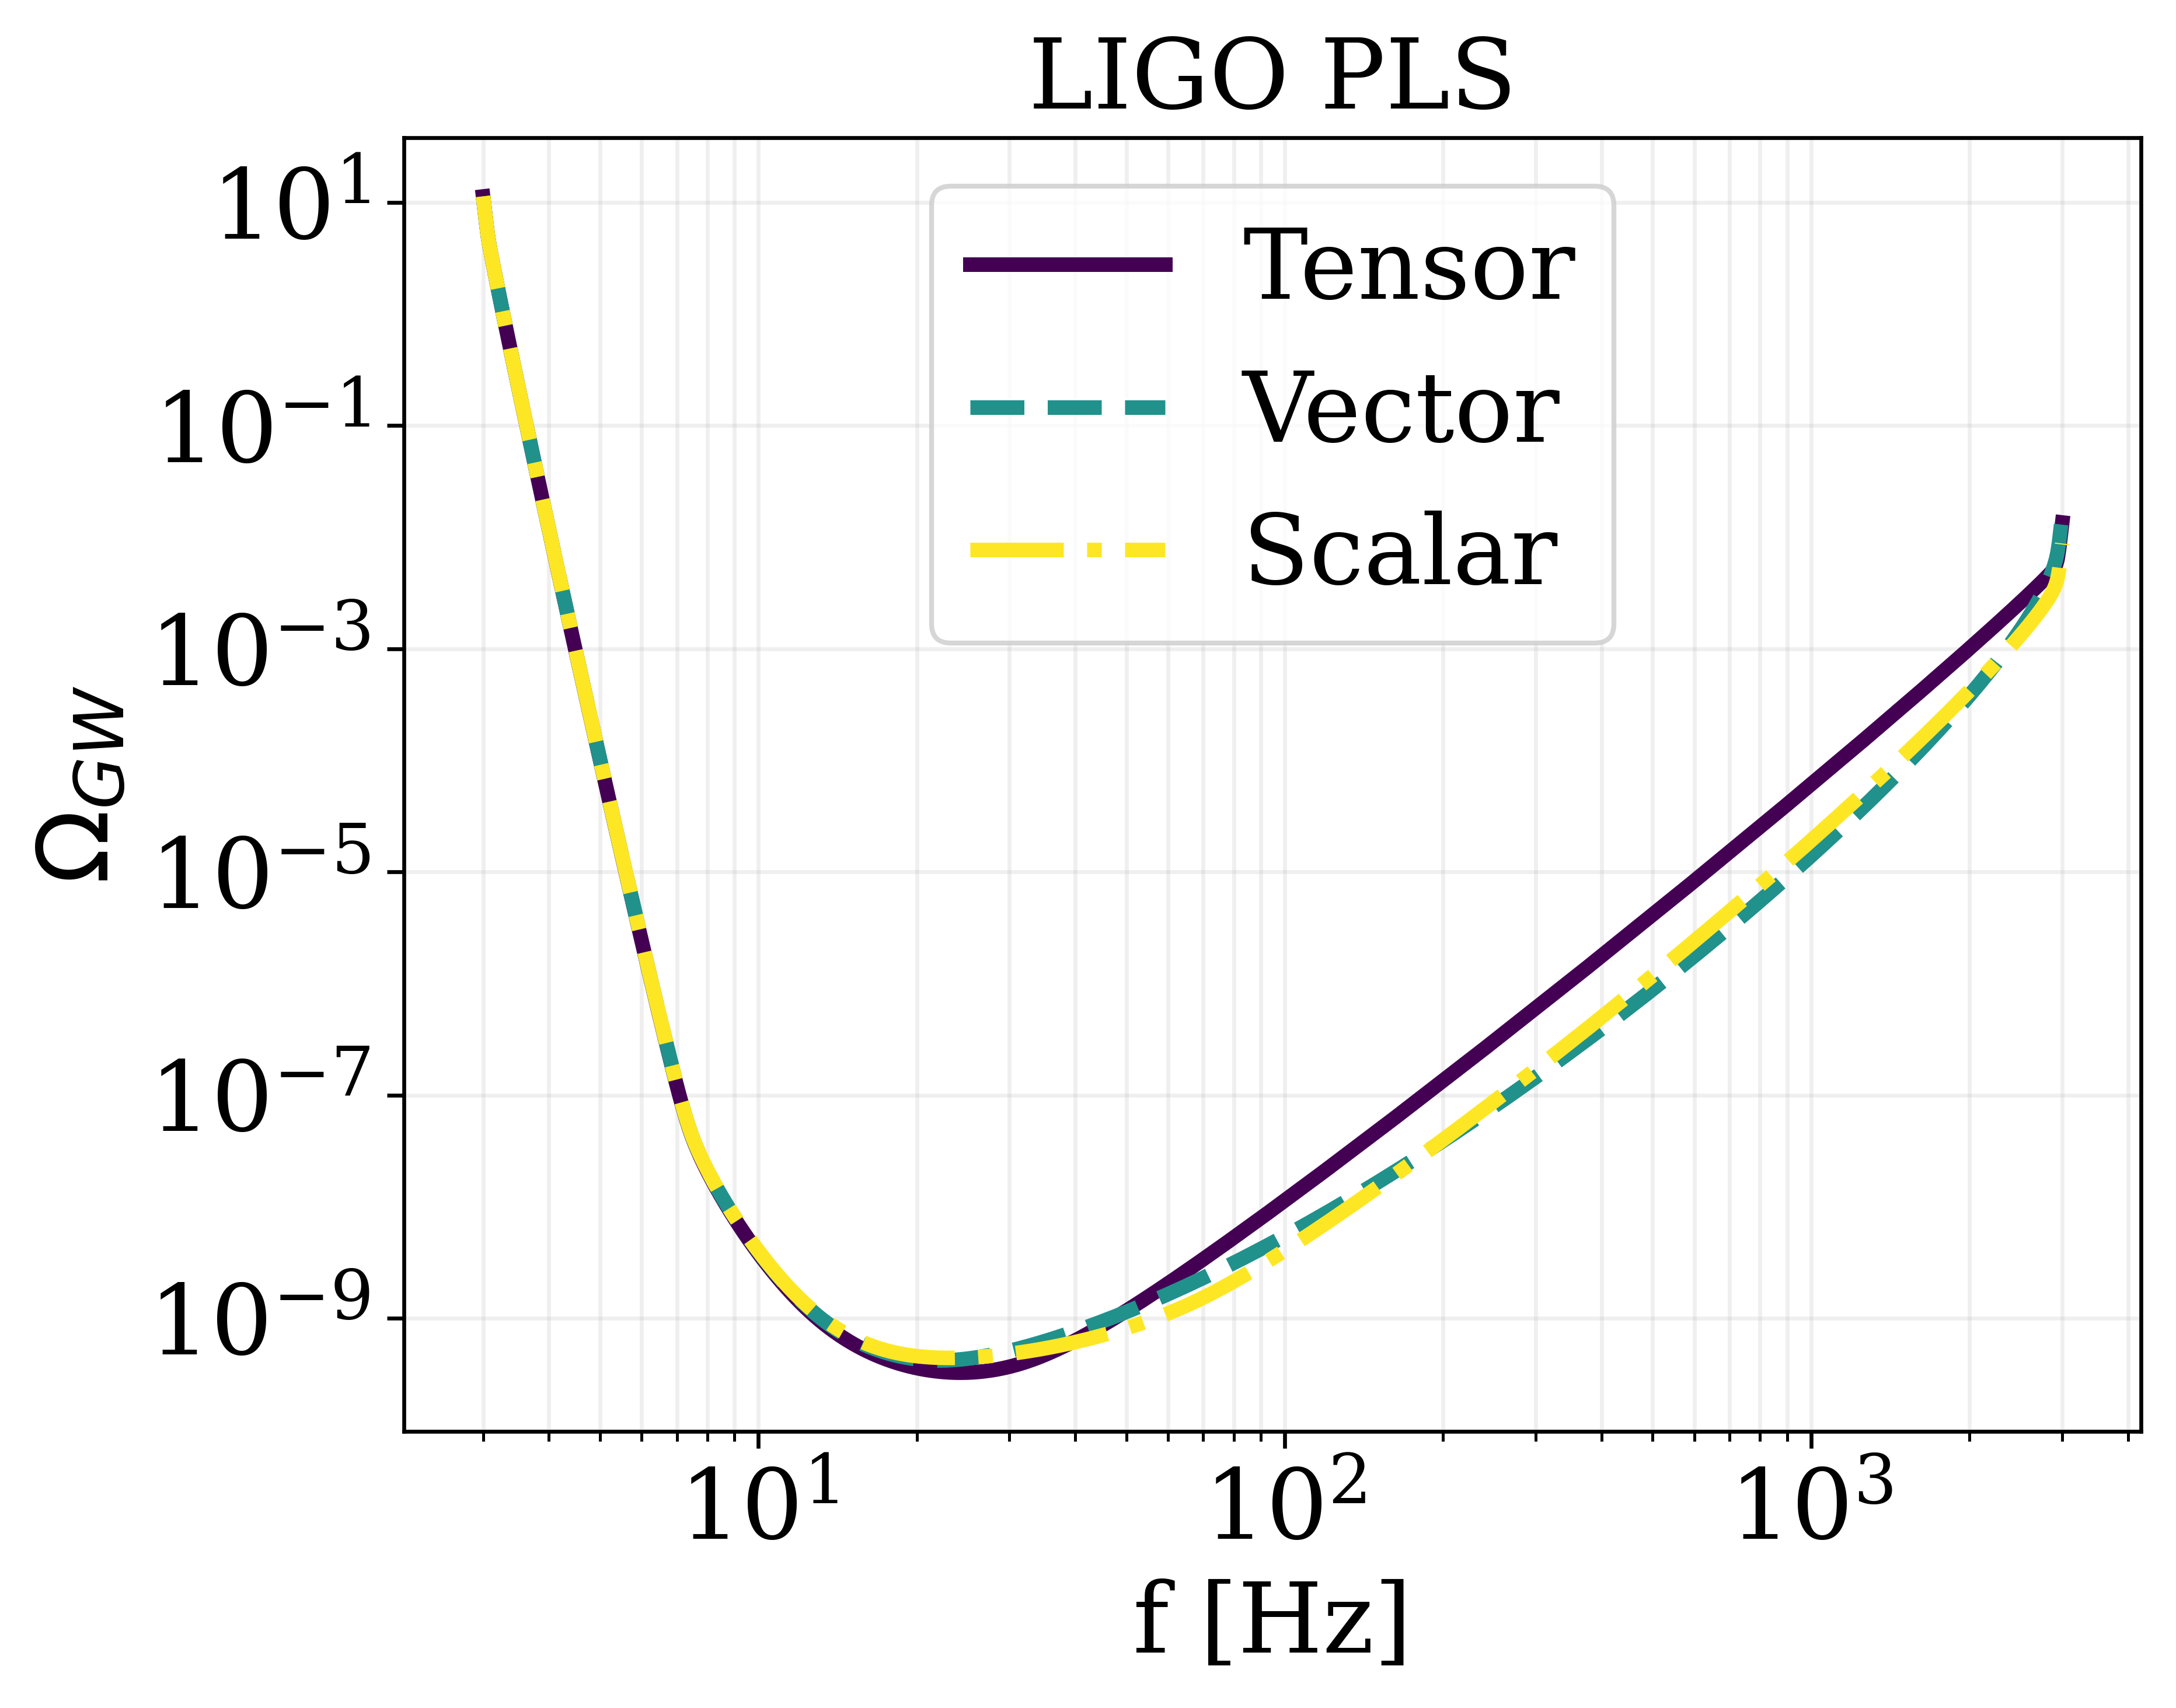

In [12]:
f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40

pls_LIGO_t = pls.PLS('LIGO H', 'LIGO L', f, fref, 't', snr, Tobs, beta_min, beta_max, None)
pls_LIGO_v = pls.PLS('LIGO H', 'LIGO L', f, fref, 'v', snr, Tobs, beta_min, beta_max, None)
pls_LIGO_s = pls.PLS('LIGO H', 'LIGO L', f, fref, 's', snr, Tobs, beta_min, beta_max, None)

colors = plt.cm.viridis(np.linspace(0, 1, 3))

plt.plot(f, pls_LIGO_t, label='Tensor', color=colors[0])
plt.plot(f, pls_LIGO_v, label='Vector', color=colors[1], linestyle='--')
plt.plot(f, pls_LIGO_s, label='Scalar', color=colors[2], linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.title('LIGO PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()

* Angular Response

In [13]:
print('Calculating Angular response for the monopole...')   
print('- tensor modes')
R0_t_LIGO = AngularResponse.R_ell(0, 'LIGO H', 'LIGO L', f, 't', shift_angle=None)
print('- vector modes')
R0_v_LIGO = AngularResponse.R_ell(0, 'LIGO H', 'LIGO L', f, 'v', shift_angle=None)
print('- scalar modes')
R0_s_LIGO = AngularResponse.R_ell(0, 'LIGO H', 'LIGO L', f, 's', shift_angle=None)

print('Calculating Angular response for the dipole...')   
print('- tensor modes')
R1_t_LIGO = AngularResponse.R_ell(1, 'LIGO H', 'LIGO L', f, 't', shift_angle=None)
print('- vector modes')
R1_v_LIGO = AngularResponse.R_ell(1, 'LIGO H', 'LIGO L', f, 'v', shift_angle=None)
print('- scalar modes')
R1_s_LIGO = AngularResponse.R_ell(1, 'LIGO H', 'LIGO L', f, 's', shift_angle=None)

print('Calculating Angular response for the quadrupole...')   
print('- tensor modes')
R2_t_LIGO = AngularResponse.R_ell(2, 'LIGO H', 'LIGO L', f, 't', shift_angle=None)
print('- vector modes')
R2_v_LIGO = AngularResponse.R_ell(2, 'LIGO H', 'LIGO L', f, 'v', shift_angle=None)
print('- scalar modes')
R2_s_LIGO = AngularResponse.R_ell(2, 'LIGO H', 'LIGO L', f, 's', shift_angle=None)

print('Calculating Angular response for the octupole...')   
print('- tensor modes')
R3_t_LIGO = AngularResponse.R_ell(3, 'LIGO H', 'LIGO L', f, 't', shift_angle=None)
print('- vector modes')
R3_v_LIGO = AngularResponse.R_ell(3, 'LIGO H', 'LIGO L', f, 'v', shift_angle=None)
print('- scalar modes')
R3_s_LIGO = AngularResponse.R_ell(3, 'LIGO H', 'LIGO L', f, 's', shift_angle=None)


Calculating Angular response for the monopole...
- tensor modes
- vector modes
- scalar modes
Calculating Angular response for the dipole...
- tensor modes
- vector modes
- scalar modes
Calculating Angular response for the quadrupole...
- tensor modes
- vector modes
- scalar modes
Calculating Angular response for the octupole...
- tensor modes
- vector modes
- scalar modes


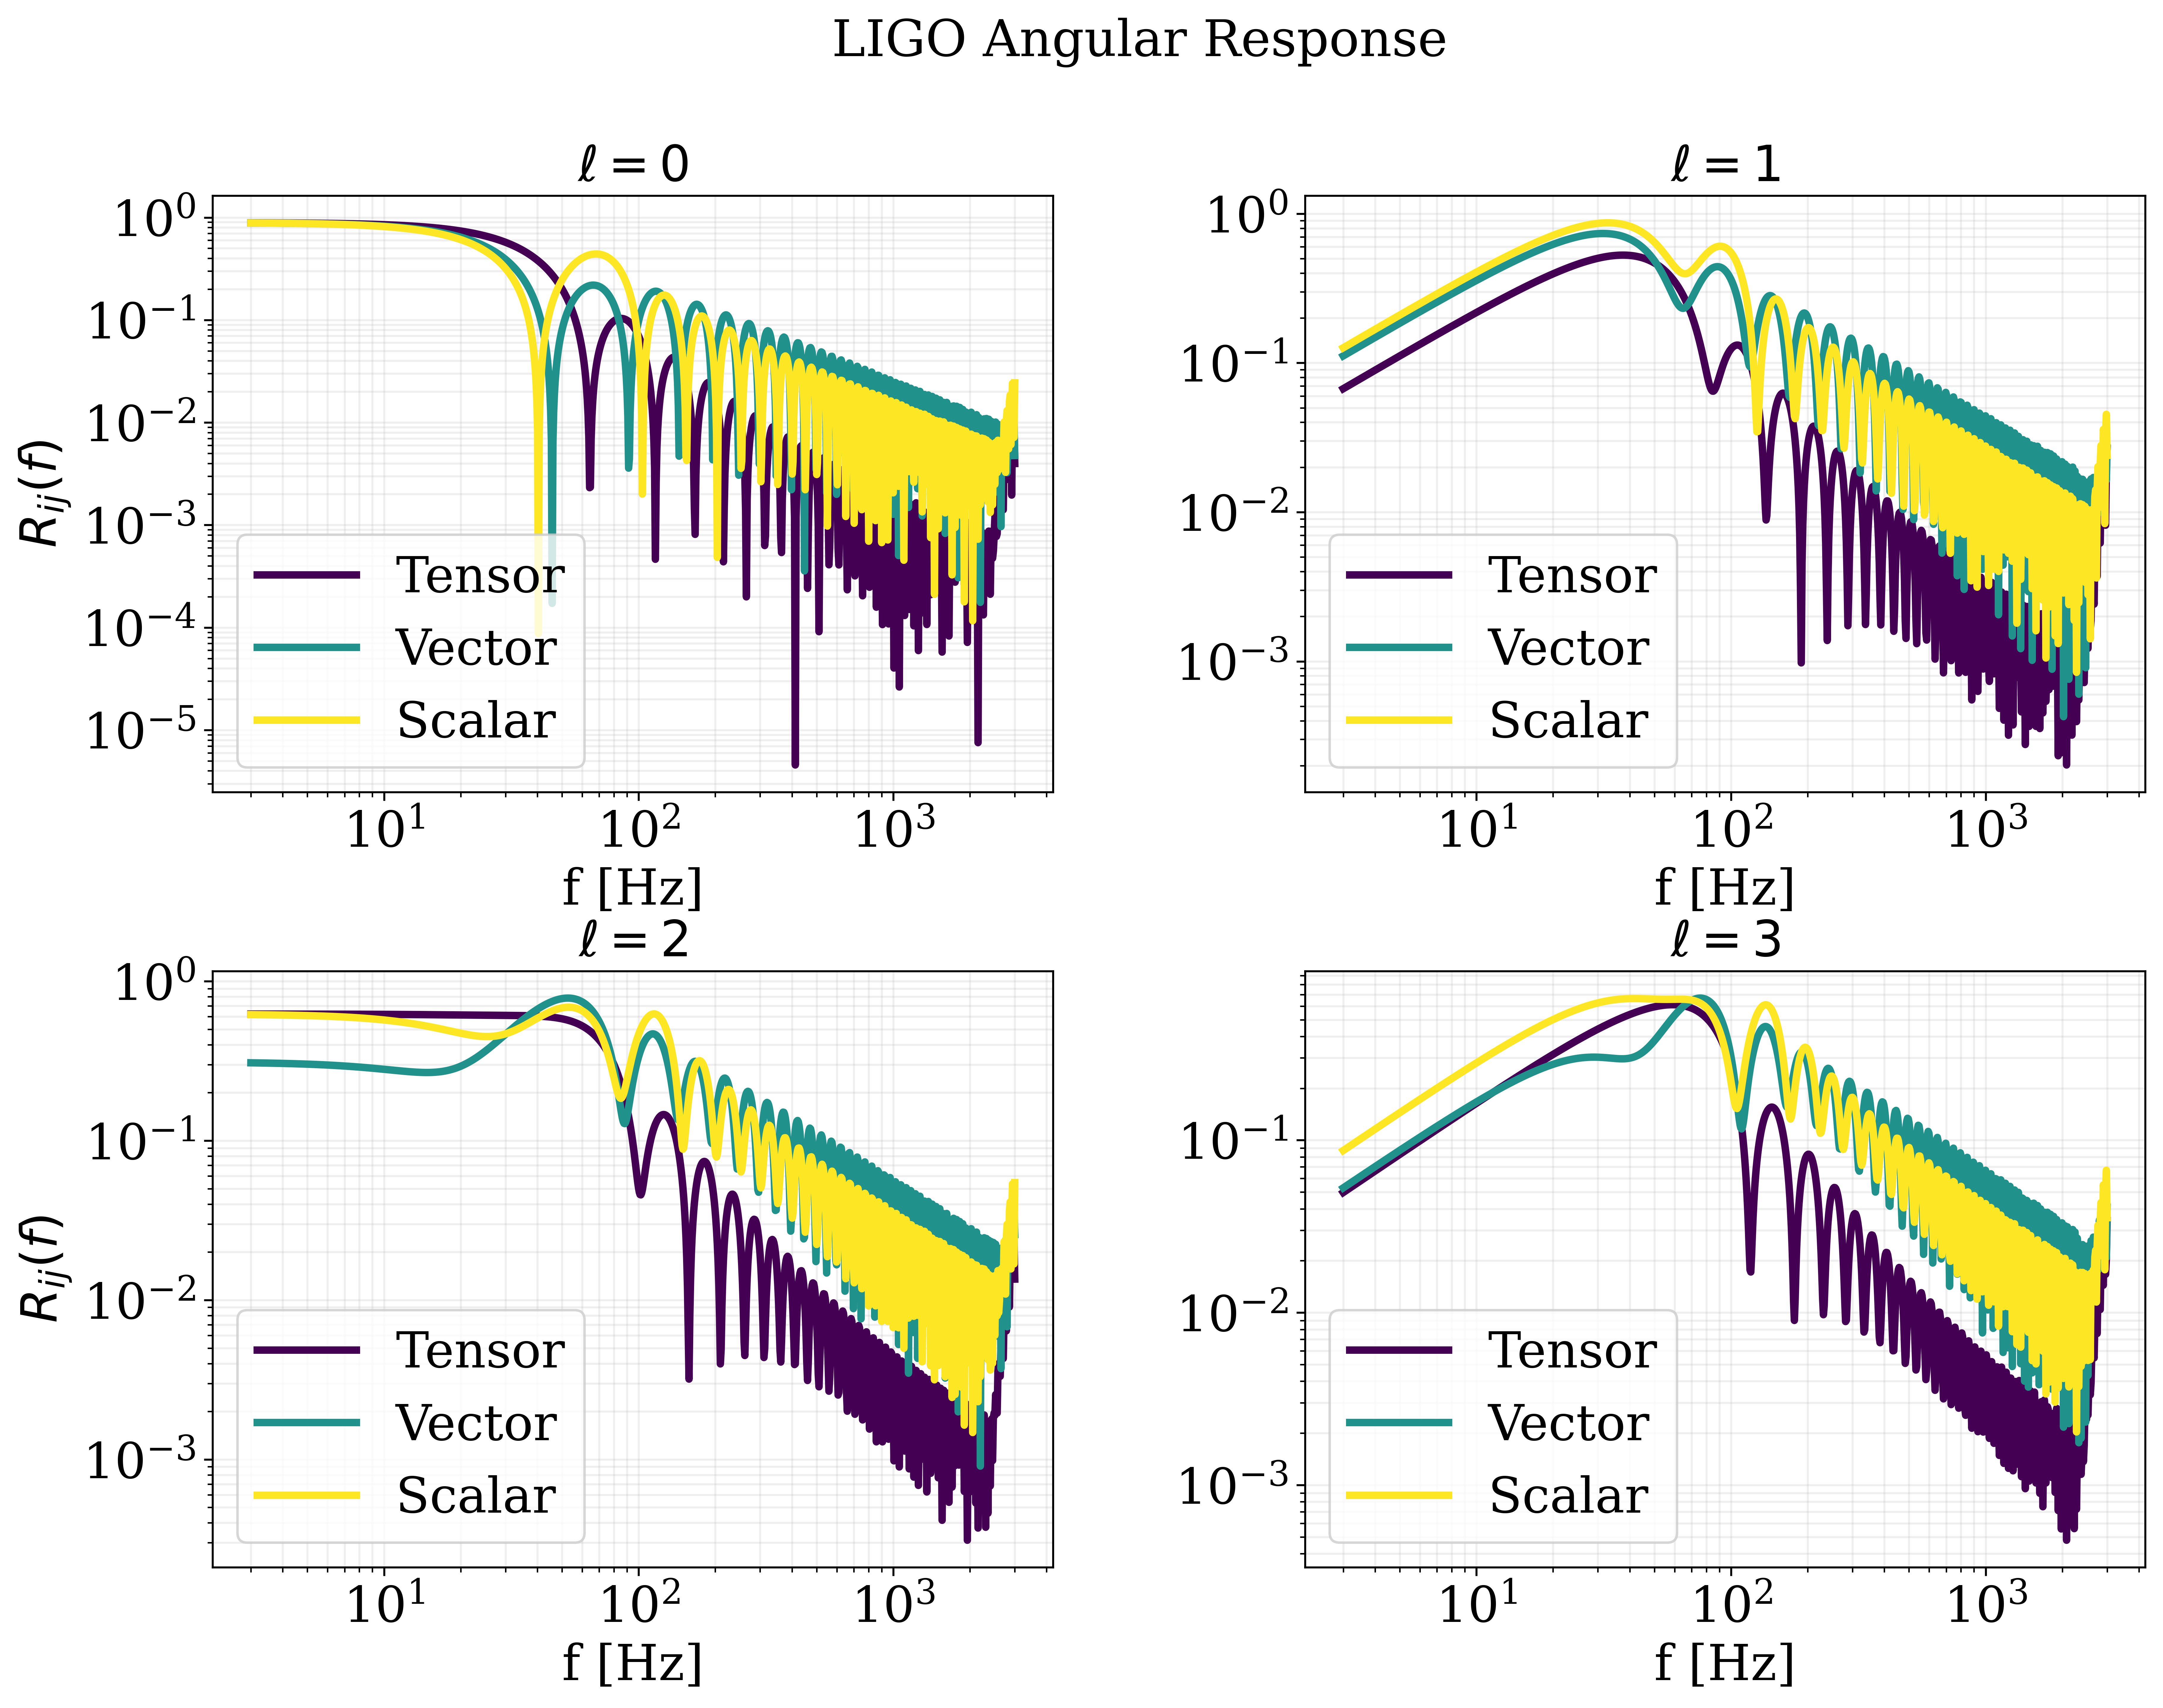

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})

# monopole
axs[0, 0].plot(f, R0_t_LIGO, label='Tensor', color=colors[0])
axs[0, 0].plot(f, R0_v_LIGO, label='Vector', color=colors[1])
axs[0, 0].plot(f, R0_s_LIGO, label='Scalar', color=colors[2])
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('f [Hz]')
axs[0, 0].set_ylabel(r'$R_{ij}(f)$')
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.2, which='both')
axs[0, 0].set_title(r'$\ell = 0$')

# dipole
axs[0, 1].plot(f, R1_t_LIGO, label='Tensor', color=colors[0])
axs[0, 1].plot(f, R1_v_LIGO, label='Vector', color=colors[1])
axs[0, 1].plot(f, R1_s_LIGO, label='Scalar', color=colors[2])
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('f [Hz]')
axs[0, 1].legend()
axs[0, 1].grid(alpha=0.2, which='both')
axs[0, 1].set_title(r'$\ell = 1$')

# quadrupole
axs[1, 0].plot(f, R2_t_LIGO, label='Tensor', color=colors[0])
axs[1, 0].plot(f, R2_v_LIGO, label='Vector', color=colors[1])
axs[1, 0].plot(f, R2_s_LIGO, label='Scalar', color=colors[2])
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('f [Hz]')
axs[1, 0].set_ylabel(r'$R_{ij}(f)$')
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.2, which='both')
axs[1, 0].set_title(r'$\ell = 2$')

# octupole
axs[1, 1].plot(f, R3_t_LIGO, label='Tensor', color=colors[0])
axs[1, 1].plot(f, R3_v_LIGO, label='Vector', color=colors[1])
axs[1, 1].plot(f, R3_s_LIGO, label='Scalar', color=colors[2])
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('f [Hz]')
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.2, which='both')
axs[1, 1].set_title(r'$\ell = 3$')

# Imposta il titolo principale
fig.suptitle('LIGO Angular Response ')

plt.show()

* Angular sensitivity

In [15]:
Omega_0_t_LIGO = Sensitivity_ell.Omega_ell('LIGO H', 'LIGO L', R0_t_LIGO, f)
Omega_0_v_LIGO = Sensitivity_ell.Omega_ell('LIGO H', 'LIGO L', R0_v_LIGO, f)
Omega_0_s_LIGO = Sensitivity_ell.Omega_ell('LIGO H', 'LIGO L', R0_s_LIGO, f)

Omega_1_t_LIGO = Sensitivity_ell.Omega_ell('LIGO H', 'LIGO L', R1_t_LIGO, f)
Omega_1_v_LIGO = Sensitivity_ell.Omega_ell('LIGO H', 'LIGO L', R1_v_LIGO, f)
Omega_1_s_LIGO = Sensitivity_ell.Omega_ell('LIGO H', 'LIGO L', R1_s_LIGO, f)

Omega_2_t_LIGO = Sensitivity_ell.Omega_ell('LIGO H', 'LIGO L', R2_t_LIGO, f)
Omega_2_v_LIGO = Sensitivity_ell.Omega_ell('LIGO H', 'LIGO L', R2_v_LIGO, f)
Omega_2_s_LIGO = Sensitivity_ell.Omega_ell('LIGO H', 'LIGO L', R2_s_LIGO, f)

Omega_3_t_LIGO = Sensitivity_ell.Omega_ell('LIGO H', 'LIGO L', R3_t_LIGO, f)
Omega_3_v_LIGO = Sensitivity_ell.Omega_ell('LIGO H', 'LIGO L', R3_v_LIGO, f)
Omega_3_s_LIGO = Sensitivity_ell.Omega_ell('LIGO H', 'LIGO L', R3_s_LIGO, f)


Text(0, 0.5, '$\\Omega_{GW} h^2/\\sqrt{4\\pi}$ ')

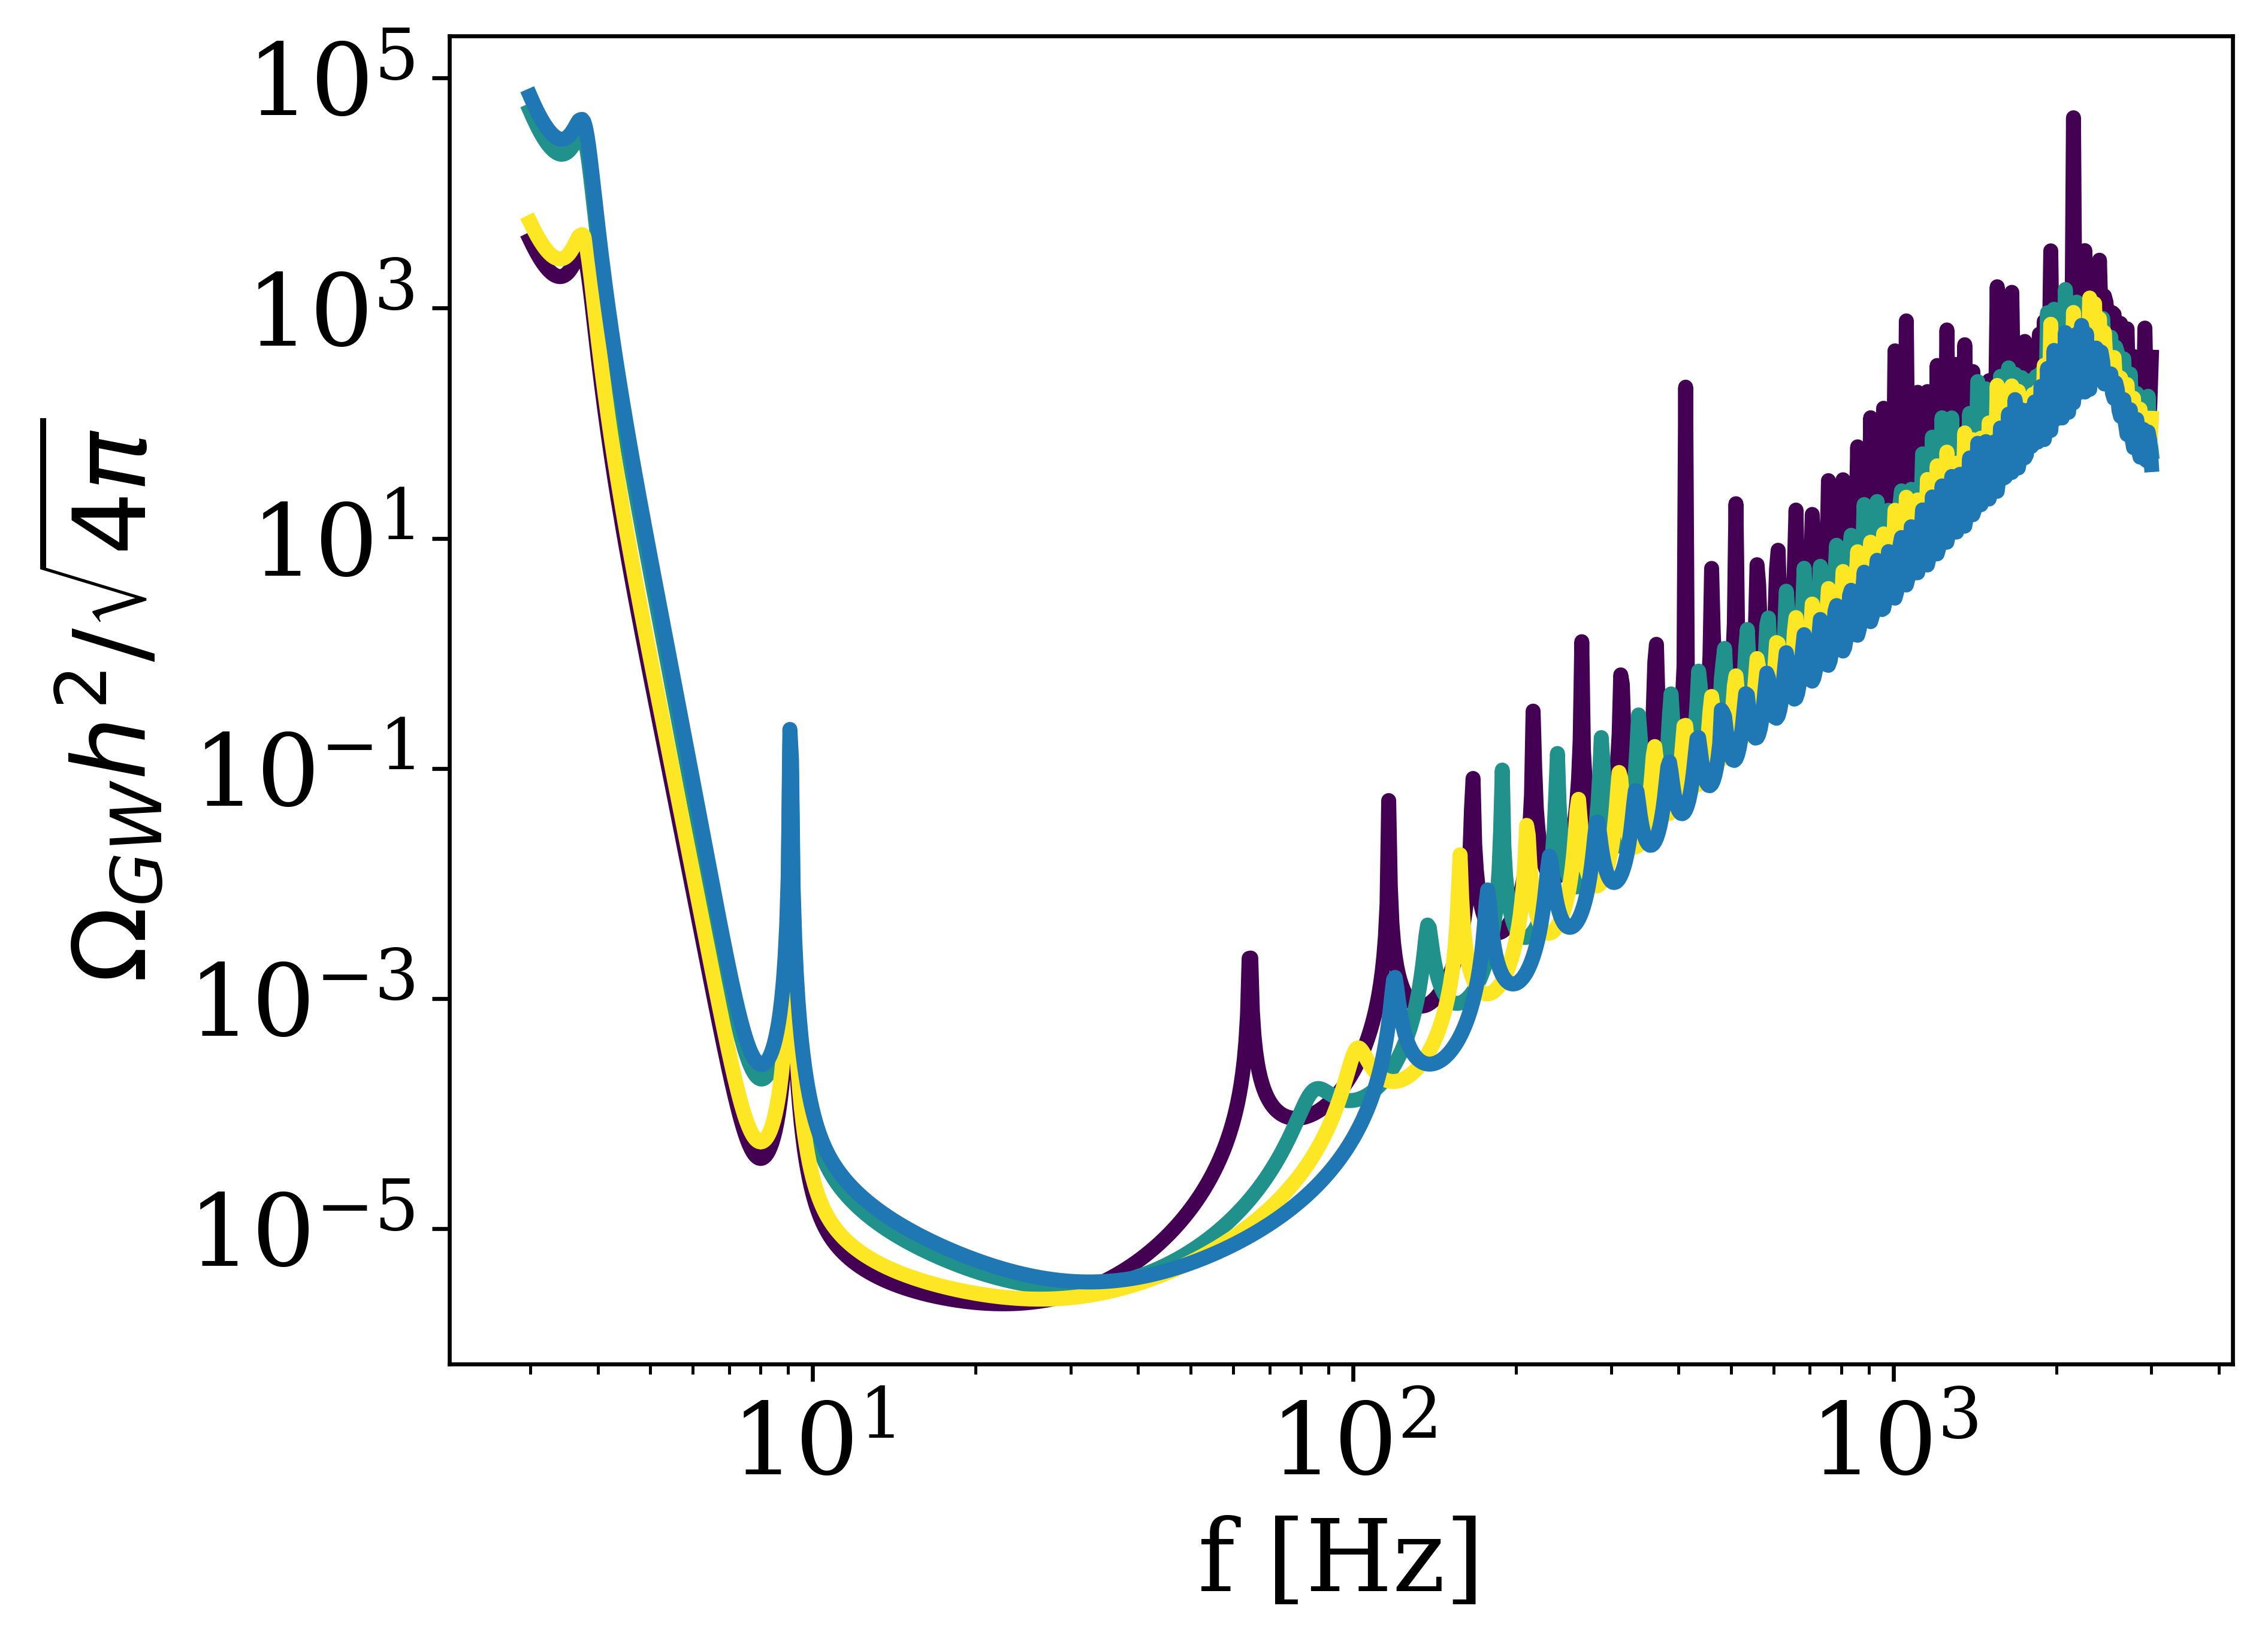

In [16]:
plt.loglog(f, Omega_0_t_LIGO, label=r'$\ell = 0$', color=colors[0])
plt.loglog(f, Omega_1_t_LIGO, label=r'$\ell = 1$', color=colors[1])
plt.loglog(f, Omega_2_t_LIGO, label=r'$\ell = 2$', color=colors[2])
plt.loglog(f, Omega_3_t_LIGO, label=r'$\ell = 3$')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW} h^2/\sqrt{4\pi}$ ')

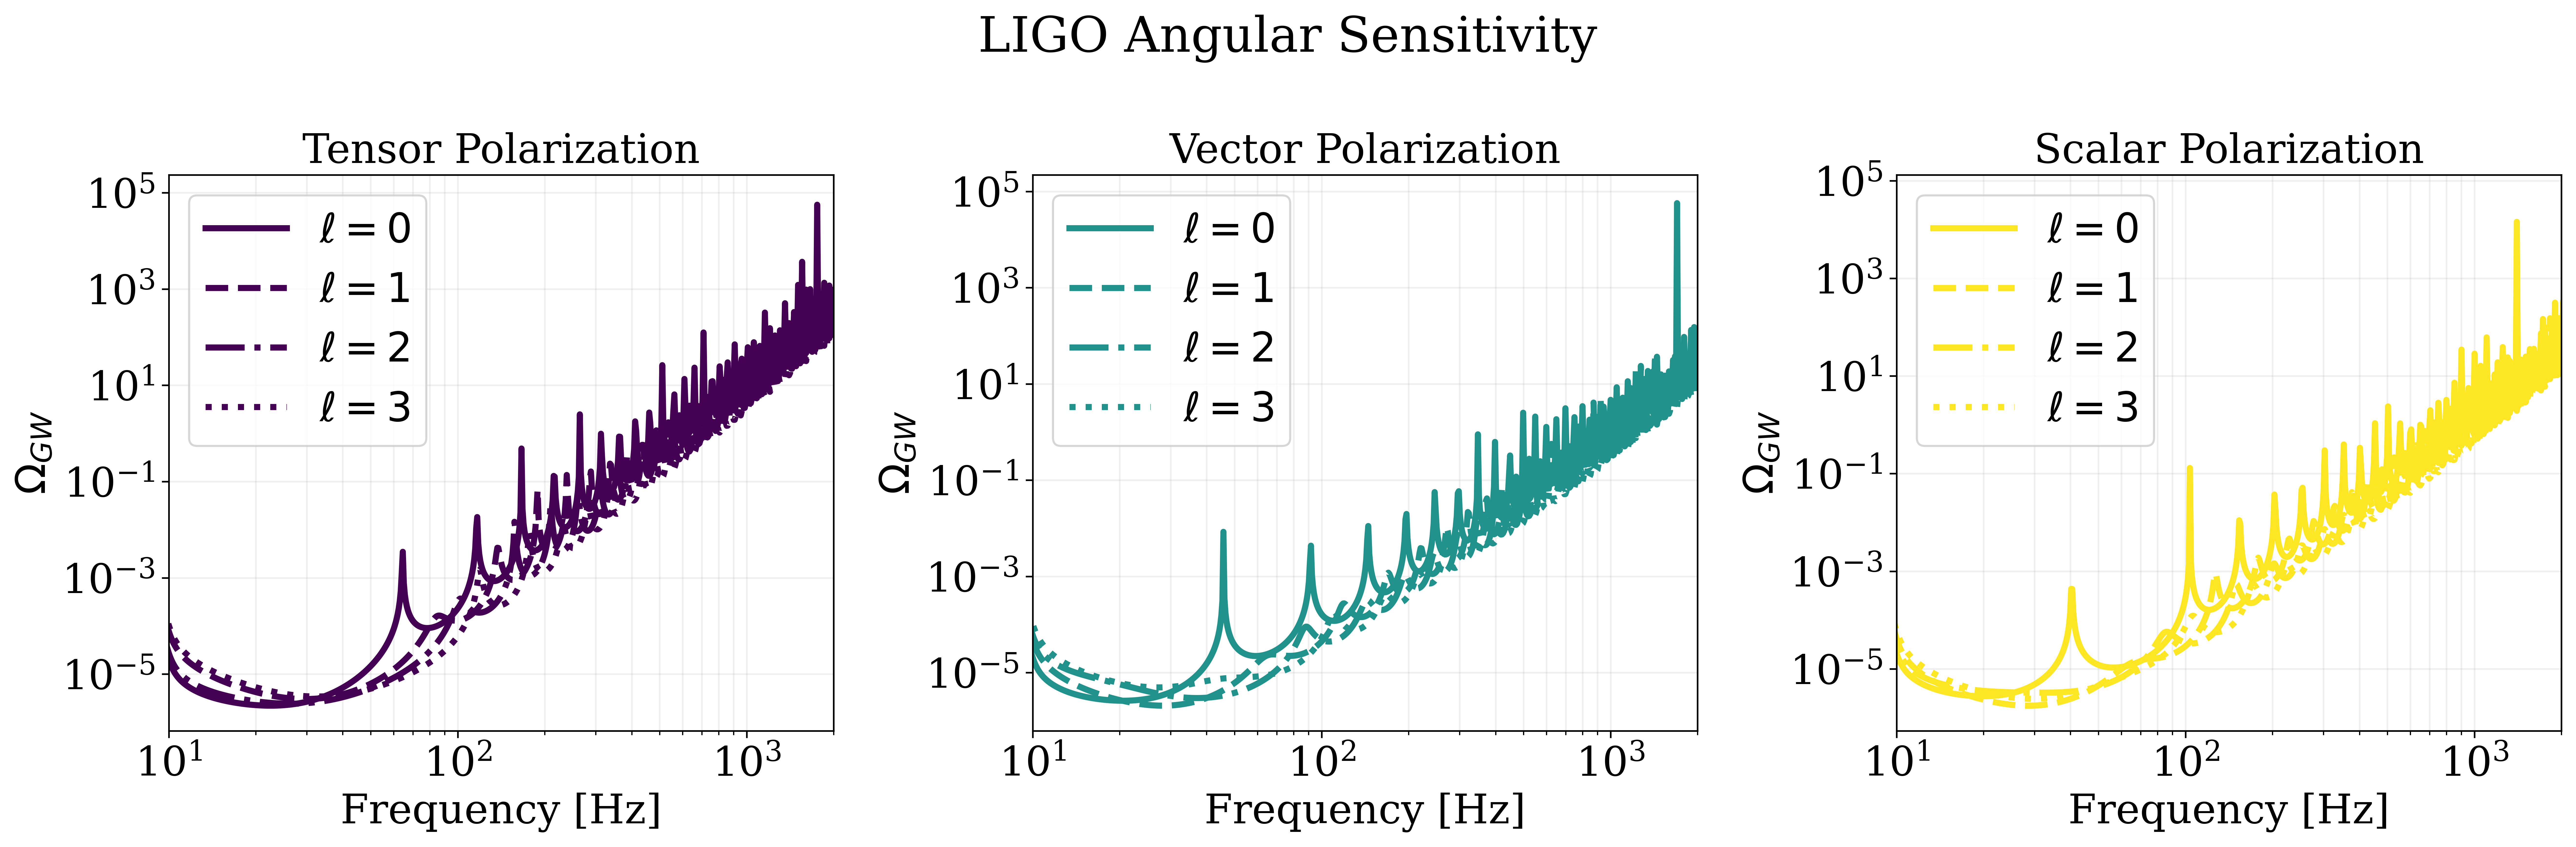

In [79]:
colors = plt.cm.viridis(np.linspace(0, 1, 3))
linestyles = ['-', '--', '-.', ':']


fig, axs = plt.subplots(1, 3, figsize=(18, 6))


axs[0].loglog(f, Omega_0_t_LIGO, label=r'$\ell=0$', color=colors[0], linestyle=linestyles[0])
axs[0].loglog(f, Omega_1_t_LIGO, label=r'$\ell=1$', color=colors[0], linestyle=linestyles[1])
axs[0].loglog(f, Omega_2_t_LIGO, label=r'$\ell=2$', color=colors[0], linestyle=linestyles[2])
axs[0].loglog(f, Omega_3_t_LIGO, label=r'$\ell=3$', color=colors[0], linestyle=linestyles[3])
axs[0].set_xlabel('Frequency [Hz]')
axs[0].set_ylabel(r'$\Omega_{GW}$')
axs[0].legend()
axs[0].grid(alpha=0.2, which='both')
axs[0].set_xlim(10, 2000)
axs[0].set_title('Tensor Polarization')


axs[1].loglog(f, Omega_0_v_LIGO, label=r'$\ell=0$', color=colors[1], linestyle=linestyles[0])
axs[1].loglog(f, Omega_1_v_LIGO, label=r'$\ell=1$', color=colors[1], linestyle=linestyles[1])
axs[1].loglog(f, Omega_2_v_LIGO, label=r'$\ell=2$', color=colors[1], linestyle=linestyles[2])
axs[1].loglog(f, Omega_3_v_LIGO, label=r'$\ell=3$', color=colors[1], linestyle=linestyles[3])
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel(r'$\Omega_{GW}$')
axs[1].legend()
axs[1].grid(alpha=0.2, which='both')
axs[1].set_xlim(10, 2000)

axs[1].set_title('Vector Polarization')


axs[2].loglog(f, Omega_0_s_LIGO, label=r'$\ell=0$', color=colors[2], linestyle=linestyles[0])
axs[2].loglog(f, Omega_1_s_LIGO, label=r'$\ell=1$', color=colors[2], linestyle=linestyles[1])
axs[2].loglog(f, Omega_2_s_LIGO, label=r'$\ell=2$', color=colors[2], linestyle=linestyles[2])
axs[2].loglog(f, Omega_3_s_LIGO, label=r'$\ell=3$', color=colors[2], linestyle=linestyles[3])
axs[2].set_xlabel('Frequency [Hz]')
axs[2].set_ylabel(r'$\Omega_{GW}$')
axs[2].legend()
axs[2].grid(alpha=0.2, which='both')
axs[2].set_xlim(10, 2000)

axs[2].set_title('Scalar Polarization')

fig.suptitle('LIGO Angular Sensitivity')

plt.tight_layout()
plt.show()